#Stocks Returns



In [0]:
#if you are using google drive like me
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd "/content/drive/My Drive/go_beyond/project/project_1"

/content/drive/My Drive/go_beyond/project/project_1


### Load Packages

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math

#remove pandas warning 
import pandas.plotting._converter as pandacnv
pandacnv.register()

## Market Data
### First of all, load the data :)

In [0]:
df = pd.read_csv('eod-quotemedia.csv', parse_dates=['date'], index_col=False)
close = df.reset_index().pivot(index='date', columns='ticker', values='adj_close')

### Show me the data! :P

In [0]:
print('Data: \n-Here I am')
print(81*'-')
print(close.head())

Data: 
-Here I am
---------------------------------------------------------------------------------
ticker              A        AAL        AAP  ...        ZBH       ZION        ZTS
date                                         ...                                 
2013-07-01  29.994186  16.176093  81.138217  ...  71.898827  27.858587  29.447893
2013-07-02  29.650137  15.819834  80.722073  ...  72.934172  28.038932  28.572441
2013-07-03  29.705185  16.127950  81.237299  ...  72.301458  28.181310  28.168387
2013-07-05  30.434568  16.214608  81.821882  ...  73.164246  29.396267  29.024598
2013-07-08  30.524021  16.310894  82.951417  ...  73.892823  29.576612  29.765365

[5 rows x 495 columns]


### I want a graph, plzzzz!

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
def plot_singleStock(dates, prices, title):
  sns.lineplot(x = dates, y = prices)
  plt.title(title)
  plt.show()

Your wish is an order!


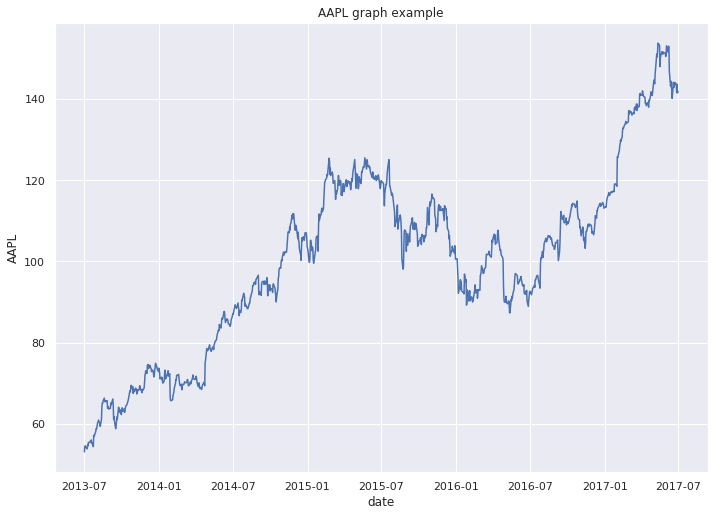

In [0]:
print('Your wish is an order!')
plot_singleStock(close.index, close.AAPL, 'AAPL graph example')

### Let's resample the Adjusted Prices

Our data is based on daily prices, let's create a function to resample it if we need

In [0]:
def resample_prices(close_prices, freq='M'):
    #select the last observation of each month
    return close_prices.resample(freq).last()

Let's check if we did it correctly :O

In [52]:
df_monthly = resample_prices(close)

print('That\'s right?')
print(82*'-')
print(df_monthly.head())
print(82*'-')
print('Yeah!')

That's right?
----------------------------------------------------------------------------------
ticker              A        AAL         AAP  ...        ZBH       ZION        ZTS
date                                          ...                                 
2013-07-31  30.778617  18.631393   81.732709  ...  80.028191  28.133851  28.740319
2013-08-31  32.092884  15.559861   79.334925  ...  75.819706  26.584661  28.104002
2013-09-30  35.346979  18.255876   81.982130  ...  78.936357  26.061902  30.003311
2013-10-31  35.009028  21.154093   98.342860  ...  84.058477  26.988611  30.585820
2013-11-30  36.947077  22.608016  100.157413  ...  87.844811  27.916745  30.093124

[5 rows x 495 columns]
----------------------------------------------------------------------------------
Yeah!


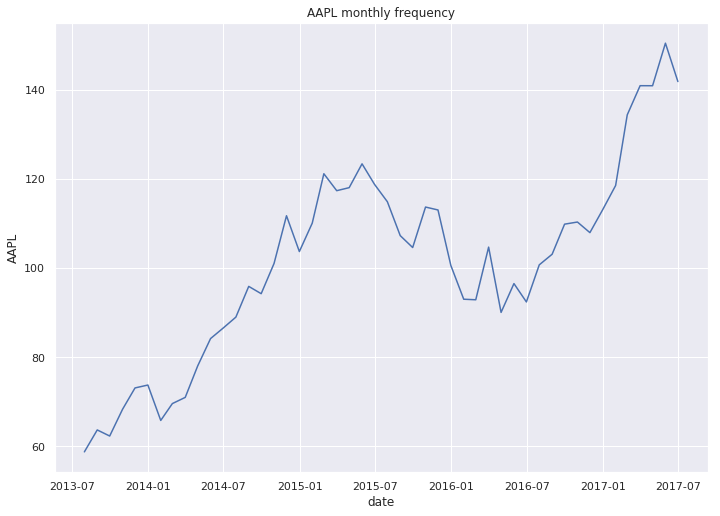

In [0]:
plot_singleStock(df_monthly.index, df_monthly.AAPL, 'AAPL monthly frequency')

## Returns normalizes our data

### Returns
---
###Raw Return


$$r = \frac{P_t - P_{t-1}}{P_{t-1}}$$

---
###Log Return


$$R = ln(\frac{P_t}{P_{t-1}})$$

---
### Converting
$$r = e^R-1$$
$$R = ln(r + 1)$$


In [0]:
def compute_rawReturn(df):
  #drop the first row because it's NAN
  return df.pct_change().iloc[1:]

def compute_logReturn(df):
  #drop the first row because it's NAN
  df = np.log(1 + compute_rawReturn(df))
  #or df = df.apply(lambda x: np.log(x) - np.log(x.shift(1))) 
  return df

In [0]:
df_rawRet = compute_rawReturn(df_monthly)
df_logRet = compute_logReturn(df_monthly)

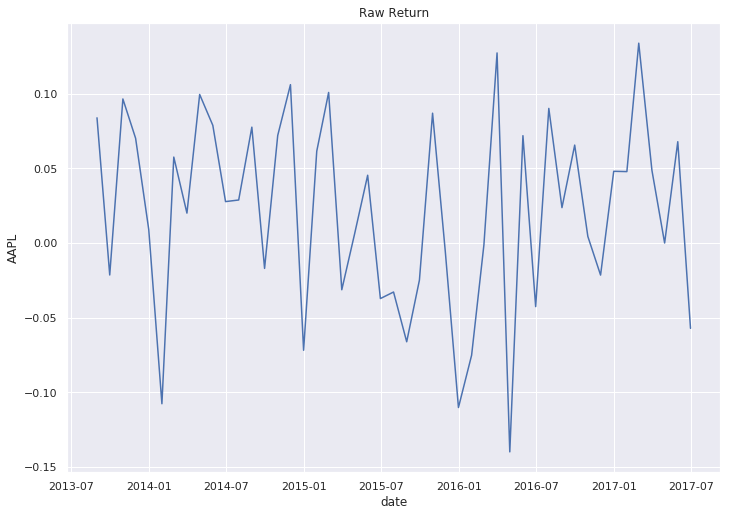

-----------------------------------------------------------------------------------------------


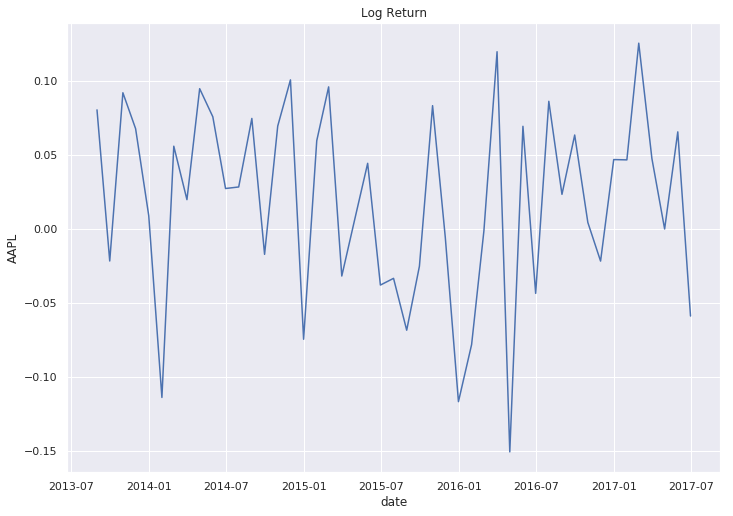

In [0]:
plot_singleStock(df_rawRet.index, df_rawRet.AAPL, 'Raw Return')
print(95*'-')
plot_singleStock(df_logRet.index, df_logRet.AAPL, 'Log Return')

**Why they are so similar?**

Let's plot other graph!

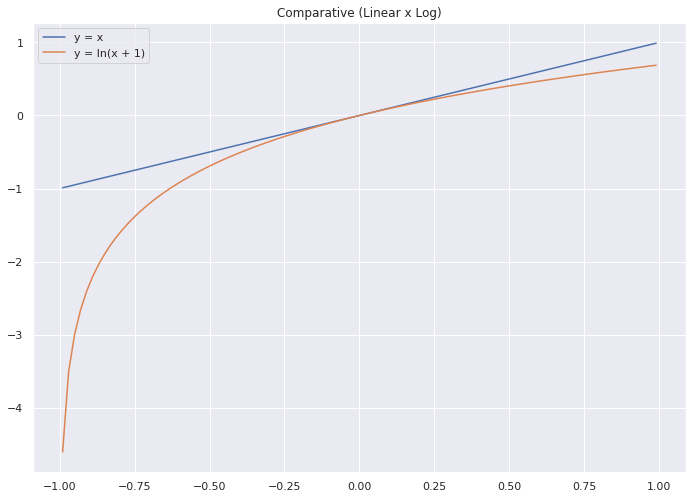

In [0]:
x = np.linspace(-0.99, 0.99, 100) 
y = x

plt.plot(x , y, label="y = x")
plt.plot(x, np.log(x+1), label="y = ln(x + 1)")
plt.legend()
plt.title('Comparative (Linear x Log)')
plt.show()

As we can see, if the value of the **Log Return is small**, it is **approximately equals** the **Raw Return**

### But why we love Log Returns?

Useful link to understand more: [click here](http://mktlssns.blogspot.com/2010/04/why-we-use-log-returns.html)

Let's start with **Compounding**:

---

Suppose you have 10$ and invest and you earned 2% interest per month


In [0]:
#after 1 month 
my_money = 10
month_rate = 0.02
result_oneMonth = month_rate * my_money + my_money
print('After one month:')
print(result_oneMonth)

print(40*'-')
#and if you want the next month???
result_twoMonths = month_rate * result_oneMonth + result_oneMonth  
print('After two months:')
print(result_twoMonths)

print('\nThe .004 makes all the difference!')

After one month:
10.2
----------------------------------------
After two months:
10.404

The .004 makes all the difference!


**Here is formula for compouding**
$$ p_t = p_{t-1} (\frac{r}{n} +1)^{n t}$$
* $p_{t-1}:$  the present value of the investment
* $r:$ the stated interest rate
* $n:$ the number of compounding periods
* $t:$ the time in years

Thank you [Investopedia](https://www.investopedia.com/terms/c/continuouscompounding.asp) for reminding me :P


In [0]:
my_money = 500
rate = 0.02
t = 1

desc = ['Annually', 'Semi-annualy', 'Quaterly', 'Monthly', 'Weekly', 'Daily']
periods = [1, 2, 4, 12, 52, 252]

for n, d in zip(periods,desc):
  pt_next = my_money * ( (rate/n) + 1 ) ** (n * t)
  print(d)
  print('Value after {0} year(s): {1:.2f}\n'.format(t, pt_next))

Annually
Value after 1 year(s): 510.00

Semi-annualy
Value after 1 year(s): 510.05

Quaterly
Value after 1 year(s): 510.08

Monthly
Value after 1 year(s): 510.09

Weekly
Value after 1 year(s): 510.10

Daily
Value after 1 year(s): 510.10



**Seems to have a limit?**

Yeah!

$$ lim_{n \to \infty}(\frac{r}{n} +1)^{n t} = e^r$$

Compounding infinitely is **continuous compounding**.

With continuous compounding, the value after 1 year is pretty close to the value after 1 year with daily compounding. (this simplify our math)


In [0]:
print('Continuous Compouding')
print('Value after 1 year(s): {:.2f}\n'.format(my_money * math.e ** rate))

Continuous Compouding
Value after 1 year(s): 510.10



**Did you find the log return?**

If your answer was no, look here:

1. $$p_t = p_{t-1} * e^r$$

2. $$\frac{p_t}{p_{t-1}} =  e^r$$

3. $$ln(\frac{p_t}{p_{t-1}}) =  r$$

Here is the log return and that's why they are **continuously compounded returns**.


**Additivity**

If we want the return of April to June, so we have: Log Return (April) + Log Return (May) + Log Return (June)

$$ ln(\frac{p_{april}}{p_{march}}) + ln(\frac{p_{may}}{p_{april}}) + ln(\frac{p_{june}}{p_{may}}) = $$
&nbsp;
$$ ln(p_{april}) - ln(p_{march}) + ln(p_{may}) - ln(p_{april}) + ln(p_{june}) - ln(p_{may}) = $$
&nbsp;
$$ ln(p_{june}) - ln(p_{march})$$

And this is the log return for April to June
$$ ln(\frac{p_{june}}{p_{march}}) $$


In [66]:
#getting march, april, may, june examples
tickers = df_logRet.index[8:11]
tickers2 = df_monthly.index[8:12]

months_log = df_logRet.loc[tickers].AAPL
months_close = df_monthly.loc[tickers2].AAPL

print('months log')
print(months_log)
print(40*'-'+'\n')
print('months close')
print(months_close)
print(40*'-'+'\n')

print('Sum months log: {:.6f}'.format(sum(months_log)))
print('ln(close_june / close_march): {:.6f}'.format(np.log(months_close[-1]/months_close[0])))

months log
date
2014-04-30    0.094761
2014-05-31    0.075775
2014-06-30    0.027286
Freq: M, Name: AAPL, dtype: float64
----------------------------------------

months close
date
2014-03-31    70.950049
2014-04-30    78.002226
2014-05-31    84.142556
2014-06-30    86.470101
Freq: M, Name: AAPL, dtype: float64
----------------------------------------

Sum months log: 0.197823
ln(close_june / close_march): 0.197823


**Numerical Stability**

Finally, log can help us with arithmetic underflow when we multiply small numbers